## **Transfer of Learning.**





<br>
<img width=400px src='https://navigato.ru/content/news/image19093.jpg'>
<br>

This dataset includes images of cats and dogs, and we will design a classifier capable of differentiating between both classes. 
---

We will do the following:

- We load the data to train and to validate the model using the ***ImageDataGenerator(...)***, making the **Data Augments**.
- We generate a convolutional architecture that learns to classify images.
- Once we have the network trained, we do the same work with an already pre-trained model (e.g. ResNet50) and we use it in the most convenient way to speed up and improve learning.

In [ ]:
# Run this to download the dataset. You can find the files in the
# corresponding directory in the Files tab on the left menu.

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
!unzip /tmp/cats_and_dogs_filtered.zip

--2023-02-24 19:44:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.0MB/s    in 4.5s    

2023-02-24 19:44:50 (14.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  /tmp/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation

In [ ]:
import tensorflow as tf

from tensorflow.keras.models                import Sequential, Model
from tensorflow.keras.preprocessing.image   import ImageDataGenerator
from tensorflow.keras.utils                 import to_categorical
from tensorflow.keras.optimizers            import SGD
from tensorflow.keras.layers                import *

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

# Create the generator.
im_gen_train = ImageDataGenerator(rescale=1./255,
                                  width_shift_range =0.15, 
                                  height_shift_range=0.15, 
                                  rotation_range=50)

im_gen_test = ImageDataGenerator(rescale=1./255)

# Create the generator.
#im_gen = ImageDataGenerator(rescale=1./255)

# Load the images from the folders
train_data = im_gen_train.flow_from_directory('./cats_and_dogs_filtered/train')
test_data  = im_gen_test.flow_from_directory('./cats_and_dogs_filtered/validation')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


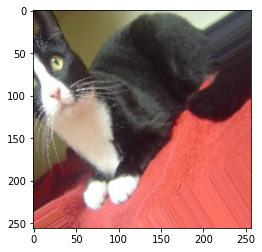

In [ ]:
# We display some of the images from our generator.
X, y = next(train_data)
plt.imshow(X[0])

In [ ]:
# START YOUR CODE HERE #

# ---- PATTERN DESIGN ---- #

# Create the model.
model = Sequential()

# Create the first convolutional layer.
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))

# Add a layer of MaxPooling.
model.add(MaxPooling2D())

# We create the second convolutional layer.
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add a second layer of MaxPooling.
model.add(MaxPooling2D())

# Create the third convolutional layer.
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Add a third layer of MaxPooling.
model.add(MaxPooling2D())

# We convert the feature maps to vector.
model.add(Flatten())

# We create the last layer with Dense connections.
model.add(Dense(units=2, activation='softmax')) 

# ---- MODEL CONFIGURATION ---- #
model.compile(optimizer=SGD(learning_rate=0.01),
              loss="categorical_crossentropy",
              metrics=["acc"])

#model.fit(train_data, validation_data=(test_data), batch_size=8, epochs=5)

In [ ]:
model.fit(train_data, validation_data=(test_data), batch_size=8, epochs=5)

Epoch 1/5
63/63 [==============================] - 38s 560ms/step - loss: 0.6976 - acc: 0.5325 - val_loss: 0.6920 - val_acc: 0.5010
Epoch 2/5
63/63 [==============================] - 35s 559ms/step - loss: 0.6844 - acc: 0.5455 - val_loss: 0.6652 - val_acc: 0.6010
Epoch 3/5
63/63 [==============================] - 35s 562ms/step - loss: 0.6730 - acc: 0.5715 - val_loss: 0.6545 - val_acc: 0.5950
Epoch 4/5
63/63 [==============================] - 35s 563ms/step - loss: 0.6731 - acc: 0.5720 - val_loss: 0.6550 - val_acc: 0.6030
Epoch 5/5
63/63 [==============================] - 36s 575ms/step - loss: 0.6684 - acc: 0.5695 - val_loss: 0.6526 - val_acc: 0.6220


In [ ]:
# Pre-trained model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

# Create the generator.
im_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load the images from the folders.
train_data = im_gen.flow_from_directory('./cats_and_dogs_filtered/train')
test_data  = im_gen.flow_from_directory('./cats_and_dogs_filtered/validation')

pretrained_vgg = VGG19(include_top=False, weights="imagenet", input_shape=(256, 256, 3))

# Freezing the parameters of the VGG model.
pretrained_vgg.trainable = False

model = Sequential()

model.add(pretrained_vgg)
model.add(Flatten())

model.add(Dense(100, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(SGD(learning_rate=0.01),
              loss="categorical_crossentropy",
              metrics="accuracy")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
model.fit(train_data, validation_data=(test_data), batch_size=8, epochs=5)

Epoch 1/5
63/63 [==============================] - 27s 365ms/step - loss: 7.0571 - accuracy: 0.8705 - val_loss: 0.3410 - val_accuracy: 0.9650
Epoch 2/5
63/63 [==============================] - 19s 305ms/step - loss: 0.3393 - accuracy: 0.9750 - val_loss: 0.2832 - val_accuracy: 0.9710
Epoch 3/5
63/63 [==============================] - 19s 309ms/step - loss: 0.2324 - accuracy: 0.9940 - val_loss: 0.2405 - val_accuracy: 0.9770
Epoch 4/5
63/63 [==============================] - 19s 309ms/step - loss: 0.1928 - accuracy: 0.9960 - val_loss: 0.2104 - val_accuracy: 0.9760
Epoch 5/5
63/63 [==============================] - 19s 306ms/step - loss: 0.1639 - accuracy: 0.9980 - val_loss: 0.1887 - val_accuracy: 0.9780
